In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Scatterplot of Mean Precipitation by Year

In [6]:
climate_data = pd.read_csv('https://raw.githubusercontent.com/HeardLibrary/digital-scholarship/master/data/codegraf/mesa2880172.csv')
climate_data['YEAR'] = climate_data['DATE'].str.slice(0, 4)
climate_data['MONTH'] = climate_data['DATE'].str.slice(5, 6)

all_years = range(1896, 2018)
prcp_means = []
for years in all_years:
    year_rows = climate_data[climate_data['YEAR'] == str(years)]
    year_avg_prcp = year_rows['PRCP'].mean()
    if not np.isnan(year_avg_prcp):
        year_dict = {'Year': years, 'Avg Precipitation': year_avg_prcp}
        prcp_means.append(year_dict)
prcp_means_df = pd.DataFrame(prcp_means)
prcp_means_df.head()

,Year,Avg Precipitation
0,1896,25.187500
1,1897,19.041667
2,1898,16.591667
3,1899,11.675000
4,1900,10.791667


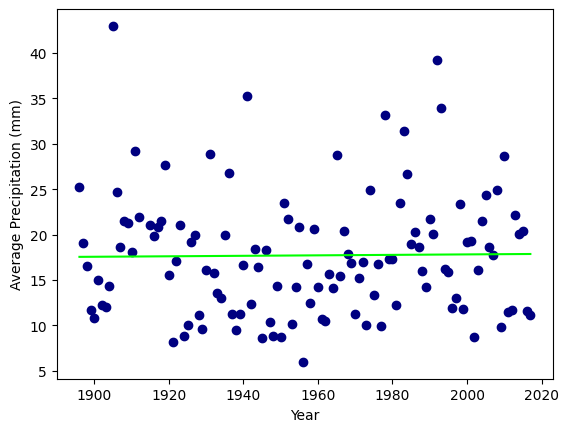

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(prcp_means_df['Year'], prcp_means_df['Avg Precipitation'], color= 'navy')

ax.set_xlabel('Year')
ax.set_ylabel('Average Precipitation (mm)')
# add a blue trendline to my data
z = np.polyfit(prcp_means_df['Year'], prcp_means_df['Avg Precipitation'], 1)
p = np.poly1d(z)
ax.plot(prcp_means_df['Year'], p(prcp_means_df['Year']), color='lime')


Scatterplot of Mean Temperature by Year

In [13]:
climate_data = pd.read_csv('https://raw.githubusercontent.com/HeardLibrary/digital-scholarship/master/data/codegraf/mesa2880172.csv')
climate_data['YEAR'] = climate_data['DATE'].str.slice(0, 4)
climate_data['MONTH'] = climate_data['DATE'].str.slice(5, 6)

all_years = range(1896, 2018)
temp_means = []
for years in all_years:
    year_rows = climate_data[climate_data['YEAR'] == str(years)]
    year_avg_temp = year_rows['TAVG'].mean()
    if not np.isnan(year_avg_temp):
        year_dict = {'Year': years, 'Avg Temperature': year_avg_temp}
        temp_means.append(year_dict)
temp_means_df = pd.DataFrame(temp_means)
temp_means_df.head()

,Year,Avg Temperature
0,1896,21.437500
1,1897,20.150000
2,1898,20.225000
3,1899,19.491667
4,1900,20.691667


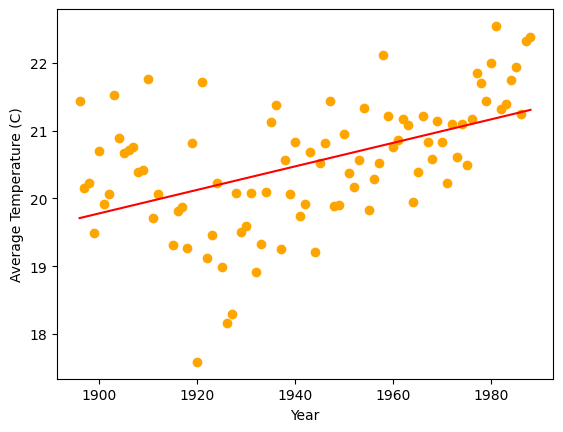

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(temp_means_df['Year'], temp_means_df['Avg Temperature'], color= 'orange')

ax.set_xlabel('Year')
ax.set_ylabel('Average Temperature (C)')

z = np.polyfit(temp_means_df['Year'], temp_means_df['Avg Temperature'], 1)
p = np.poly1d(z)
ax.plot(temp_means_df['Year'], p(temp_means_df['Year']), color='red')

Bar Plot for Mean Precipitation by Month

In [33]:
climate_data = pd.read_csv('https://raw.githubusercontent.com/HeardLibrary/digital-scholarship/master/data/codegraf/mesa2880172.csv')
climate_data['YEAR'] = climate_data['DATE'].str.slice(0, 4)
climate_data['MONTH'] = climate_data['DATE'].str.slice(5, 6)

all_years = range(1896, 2018)
all_months = range(1, 13)  # Months from 1 (January) to 12 (December)
prcp_means = []

for year in all_years:
    for month in all_months:
        month_rows = climate_data[(climate_data['YEAR'] == str(year)) & (climate_data['MONTH'] == str(month))]
        month_avg_prcp = month_rows['PRCP'].mean()
        if not np.isnan(month_avg_prcp):
            month_dict = {'Year': year, 'Month': month, 'Avg Precipitation': month_avg_prcp}
            prcp_means.append(month_dict)

prcp_means_df = pd.DataFrame(prcp_means)
prcp_means_df.head()

,Year,Month,Avg Precipitation
0,1896,1,31.933333
1,1897,1,3.366667
2,1898,1,26.133333
3,1899,1,7.000000
4,1900,1,21.433333


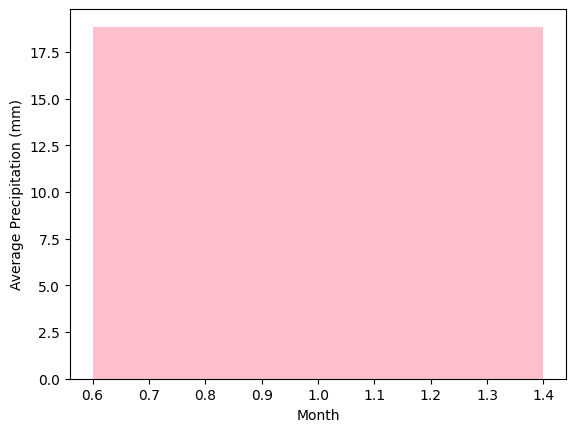

In [35]:
monthly_avg_prcp = prcp_means_df.groupby('Month')['Avg Precipitation'].mean()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.bar(monthly_avg_prcp.index, monthly_avg_prcp, color='pink')

ax.set_xlabel('Month')
ax.set_ylabel('Average Precipitation (mm)')
plt.show()